In [380]:
"""
maximum availible volume to pool into
"""
max_volume=500

"""
maximum availible volume to be taken out of well
"""
max_oligo_volume=80

"""
maximum availible volume to be taken out of well
"""
min_oligo_volume=5

# """
# target moles of oligo pmol
# """
# target_quantity=90

In [381]:
df

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,"14769,52","306,999","20,79","9,83","0,47","1,966","1,123",TRANSPOSASE,DMT OFF
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,"12204,81","171,764","14,07","9,83","0,70","1,738","0,968",TRANSPOSASE,DMT OFF
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,"13481,63","200,742","14,89","9,83","0,66","1,706","1,164",TRANSPOSASE,DMT OFF
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,"13876,91","133,745","9,64","9,83","1,02","1,863","1,002",TRANSPOSASE,DMT OFF
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,"14907,62","285,986","19,18","9,83","0,51","2,063","1,178",TRANSPOSASE,DMT OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,A5,Tr-60,#= 44,TTG CCT TTA TCC AGG TAG CCC AAA AGT TGG CAT TC...,"13529,68","271,374","20,06","9,83","0,49","1,769","1,23",TRANSPOSASE,DMT OFF
60,B5,Tr-61,#= 44,TGT ACG CCC ACT GCA ACG AAC CCG CTT TCT CTT TA...,"13345,56","190,864","14,30","9,83","0,69","1,656","1,024",TRANSPOSASE,DMT OFF
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,"14098,07","32,6","2,31","9,83","4,25","1,97","0,934",TRANSPOSASE,DMT OFF
62,D5,Tr-63,#= 40,CGC CTC CCA GCC CTC CCA CAG TGC ACC CCA GCT TG...,"12043,73","173,099","14,37","9,83","0,68","1,64","0,842",TRANSPOSASE,DMT OFF


In [382]:
EXPERIMENT_NAME = "OVFF354"
# reading file
import pandas as pd
df_calculated =  pd.read_csv(f'./content/{EXPERIMENT_NAME}_calculated.csv', delimiter='\t', decimal=".")

df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter='\t', decimal=".")

"""
strip the text everywhere on data frame
"""
cols = df.select_dtypes(object).columns
df[cols] = df[cols].apply(lambda x: x.str.strip())
"""
and again
"""
cols = df_calculated.select_dtypes(object).columns
df_calculated[cols] = df_calculated[cols].apply(lambda x: x.str.strip())

"""
now merge cleaned dataframes
"""
merge = pd.merge(df, df_calculated, on='where', how='inner', suffixes=('', '_drop'))
#Drop the duplicate columns
merge.drop([col for col in merge.columns if 'drop' in col], axis=1, inplace=True)

df = merge

df.to_csv(f'./content/{EXPERIMENT_NAME}_merged_input.csv', encoding='UTF8')

In [409]:
df

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,14769.52,306.999,20.785984,9.83,0.47,1.966,1.123,TRANSPOSASE,DMT OFF
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,12204.81,171.764,14.073468,9.83,0.70,1.738,0.968,TRANSPOSASE,DMT OFF
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,13481.63,200.742,14.890039,9.83,0.66,1.706,1.164,TRANSPOSASE,DMT OFF
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,13876.91,133.745,9.637953,9.83,1.02,1.863,1.002,TRANSPOSASE,DMT OFF
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,14907.62,285.986,19.183880,9.83,0.51,2.063,1.178,TRANSPOSASE,DMT OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,A5,Tr-60,#= 44,TTG CCT TTA TCC AGG TAG CCC AAA AGT TGG CAT TC...,13529.68,271.374,20.057681,9.83,0.49,1.769,1.230,TRANSPOSASE,DMT OFF
60,B5,Tr-61,#= 44,TGT ACG CCC ACT GCA ACG AAC CCG CTT TCT CTT TA...,13345.56,190.864,14.301685,9.83,0.69,1.656,1.024,TRANSPOSASE,DMT OFF
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,4.25,1.970,0.934,TRANSPOSASE,DMT OFF
62,D5,Tr-63,#= 40,CGC CTC CCA GCC CTC CCA CAG TGC ACC CCA GCT TG...,12043.73,173.099,14.372541,9.83,0.68,1.640,0.842,TRANSPOSASE,DMT OFF


In [410]:
# df['Nucleic Acid(ng/uL)'] = df['Nucleic Acid(ng/uL)'].str.replace(',','.').astype(float)
# df['monoisotopic_mass'] = df['monoisotopic_mass'].str.replace(',','.').astype(float)

for i in df.columns:
    try:
        df[i] = df[i].str.replace(',', '.').astype(float)
    except:
        pass
    
df['monoisotopic_mass'] = df['monoisotopic_mass'].astype(float)
df["pM/mkl"] = 1000*df['Nucleic Acid(ng/uL)']/df['monoisotopic_mass']
df=df.dropna()

# if target_quantity/min(df["pM/mkl"]) > 70:
#   print("ATTENTION! target quantity cannot be achieved - oligo concentration is too low!")
#   target_quantity=min(df["pM/mkl"])*30
#   print(f"target_quantity is set to {target_quantity:.2f} pmol instead.")

# df['mkl']=target_quantity/df["pM/mkl"]

# # if sum(df['mkl']) > 500 mkl:
# # if min(df['mkl']) < 0.2 mkl:

# df = df[df['seq'].notna()]
# volume_list = df['mkl'].to_list()

df

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,14769.52,306.999,20.785984,9.83,0.47,1.966,1.123,TRANSPOSASE,DMT OFF
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,12204.81,171.764,14.073468,9.83,0.70,1.738,0.968,TRANSPOSASE,DMT OFF
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,13481.63,200.742,14.890039,9.83,0.66,1.706,1.164,TRANSPOSASE,DMT OFF
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,13876.91,133.745,9.637953,9.83,1.02,1.863,1.002,TRANSPOSASE,DMT OFF
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,14907.62,285.986,19.183880,9.83,0.51,2.063,1.178,TRANSPOSASE,DMT OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,A5,Tr-60,#= 44,TTG CCT TTA TCC AGG TAG CCC AAA AGT TGG CAT TC...,13529.68,271.374,20.057681,9.83,0.49,1.769,1.230,TRANSPOSASE,DMT OFF
60,B5,Tr-61,#= 44,TGT ACG CCC ACT GCA ACG AAC CCG CTT TCT CTT TA...,13345.56,190.864,14.301685,9.83,0.69,1.656,1.024,TRANSPOSASE,DMT OFF
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,4.25,1.970,0.934,TRANSPOSASE,DMT OFF
62,D5,Tr-63,#= 40,CGC CTC CCA GCC CTC CCA CAG TGC ACC CCA GCT TG...,12043.73,173.099,14.372541,9.83,0.68,1.640,0.842,TRANSPOSASE,DMT OFF


In [387]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# df.columns = df.columns.str.strip()
# df_calculated["where"] = df_calculated["where"].str.strip()
# merge = df.merge(df_calculated, on='where')
# merge

In [352]:
# df_calculated.tail(3)

In [353]:
# pd.merge(left=df_calculated, right=df, how='inner', on='where')

In [271]:
# df[df["where"].isin(df_calculated['where'])]

In [272]:
# pd.set_option('max.rows', 500)

In [273]:
# df_calculated.columns

In [274]:
# df_calculated.loc[269, 'where']

In [275]:
# df.loc[16, 'where']

In [276]:
# for elem in df_calculated["where"].unique():
#     print(repr(elem))

<font color='red'>NOTICE ME</font>

Bad data with space `^`

Чтобы такого избежать, лучше при чтении таблиц указывать тип данных для каждого из столбцов (если заранее известно их чисо и тд)

---

In [277]:
# df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_concentrations.csv', delimiter=';', decimal=".")
# merge = df.merge(df_calculated, on='where')
# merge

In [278]:
# df_calculated.merge(df, on="where")

In [279]:
# df_calculated.head(3)

In [411]:
df

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,14769.52,306.999,20.785984,9.83,0.47,1.966,1.123,TRANSPOSASE,DMT OFF
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,12204.81,171.764,14.073468,9.83,0.70,1.738,0.968,TRANSPOSASE,DMT OFF
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,13481.63,200.742,14.890039,9.83,0.66,1.706,1.164,TRANSPOSASE,DMT OFF
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,13876.91,133.745,9.637953,9.83,1.02,1.863,1.002,TRANSPOSASE,DMT OFF
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,14907.62,285.986,19.183880,9.83,0.51,2.063,1.178,TRANSPOSASE,DMT OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,A5,Tr-60,#= 44,TTG CCT TTA TCC AGG TAG CCC AAA AGT TGG CAT TC...,13529.68,271.374,20.057681,9.83,0.49,1.769,1.230,TRANSPOSASE,DMT OFF
60,B5,Tr-61,#= 44,TGT ACG CCC ACT GCA ACG AAC CCG CTT TCT CTT TA...,13345.56,190.864,14.301685,9.83,0.69,1.656,1.024,TRANSPOSASE,DMT OFF
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,4.25,1.970,0.934,TRANSPOSASE,DMT OFF
62,D5,Tr-63,#= 40,CGC CTC CCA GCC CTC CCA CAG TGC ACC CCA GCT TG...,12043.73,173.099,14.372541,9.83,0.68,1.640,0.842,TRANSPOSASE,DMT OFF


In [412]:
# pool_1 = "TdT-"
# pool_2 = "p03_F2-"
# pool_3 = "p10_F1-"
# pool_4 = "p10_F2-"
pool_1 = "Tr-"
# pool_2 = "Unnamedsequence_F2-"
# pool_3 = "Unnamedsequence_F3-"


POOL_NAME=pool_1

df = df[df["code"].str.contains(f'^{POOL_NAME}\d+')]
df

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,14769.52,306.999,20.785984,9.83,0.47,1.966,1.123,TRANSPOSASE,DMT OFF
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,12204.81,171.764,14.073468,9.83,0.70,1.738,0.968,TRANSPOSASE,DMT OFF
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,13481.63,200.742,14.890039,9.83,0.66,1.706,1.164,TRANSPOSASE,DMT OFF
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,13876.91,133.745,9.637953,9.83,1.02,1.863,1.002,TRANSPOSASE,DMT OFF
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,14907.62,285.986,19.183880,9.83,0.51,2.063,1.178,TRANSPOSASE,DMT OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,A5,Tr-60,#= 44,TTG CCT TTA TCC AGG TAG CCC AAA AGT TGG CAT TC...,13529.68,271.374,20.057681,9.83,0.49,1.769,1.230,TRANSPOSASE,DMT OFF
60,B5,Tr-61,#= 44,TGT ACG CCC ACT GCA ACG AAC CCG CTT TCT CTT TA...,13345.56,190.864,14.301685,9.83,0.69,1.656,1.024,TRANSPOSASE,DMT OFF
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,4.25,1.970,0.934,TRANSPOSASE,DMT OFF
62,D5,Tr-63,#= 40,CGC CTC CCA GCC CTC CCA CAG TGC ACC CCA GCT TG...,12043.73,173.099,14.372541,9.83,0.68,1.640,0.842,TRANSPOSASE,DMT OFF


Text(0, 0.5, 'occurencies')

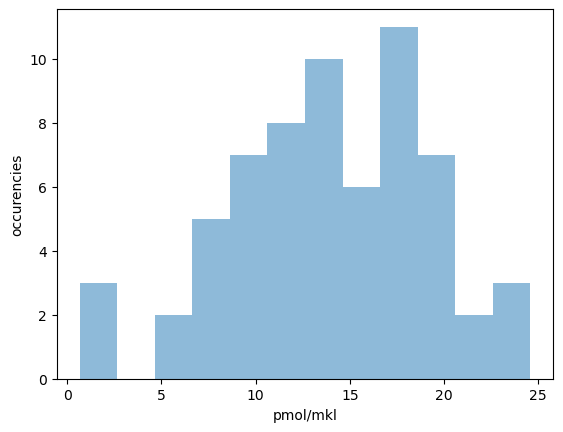

In [413]:
"""
смотрим распределение по корзинам
"""
ax = df['pM/mkl'].plot.hist(bins=12, alpha=0.5)
initial_oligos_concentrations = df['pM/mkl']
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [414]:
'''
определяем выбросы
'''
import pandas
import numpy as np
from scipy import stats

# %reload_ext google.colab.data_table

df['score'] = np.abs(stats.zscore(df['pM/mkl']))<1.8
# df[(np.abs(stats.zscore(df)) < 1.5).all(axis=1)]
filtered, filtered_off = (df[(np.abs(stats.zscore(df['pM/mkl'])) < 1.8)], df[(np.abs(stats.zscore(df['pM/mkl'])) >= 1.8)])
filtered_off

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT,score
25,O2,Tr-26,#= 41,TCT GTT GCA GCT GCG TGA GAG CTT TAC CCC ACC GC...,12514.01,8.201,0.655345,9.83,15.00,2.035,0.912,TRANSPOSASE,DMT OFF,False
29,C3,Tr-30,#= 41,GTT CGT TGC AGT GGG CGT ACA TGG CGA TTG CGC GC...,12711.12,309.029,24.311705,9.83,0.40,1.732,1.355,TRANSPOSASE,DMT OFF,False
31,E3,Tr-32,#= 44,TGT GGG AGG GCT GGG AGG CGC TGC AAT CGA AAC TG...,13749.80,23.498,1.708970,9.83,5.75,1.892,0.559,TRANSPOSASE,DMT OFF,False
35,I3,Tr-36,#= 49,CCT TCG CTG GAA ATC GTA ATG CTT TTA CCC GAA TA...,15028.65,369.481,24.585109,9.83,0.40,1.778,1.198,TRANSPOSASE,DMT OFF,False
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,4.25,1.970,0.934,TRANSPOSASE,DMT OFF,False


Text(0, 0.5, 'occurencies')

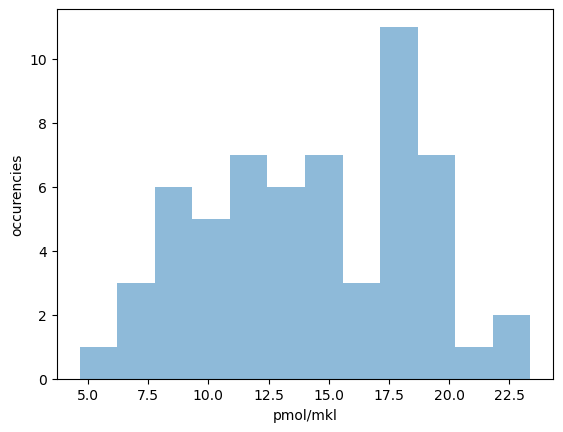

In [415]:
"""
смотрим распределение по корзинам
"""
ax = filtered['pM/mkl'].plot.hist(bins=12, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

In [416]:
# """
# split into 7 bins by quantiles
# """
# labels=["1", "2", "3", "4", "5", "6", "7"]
# filtered["quantile"] = pd.qcut(df['pM/mkl'], q=[0, 0.05, 0.1, 0.35, 0.55, 0.9, 0.95, 1], labels=labels)
# seventh_quantile_median_conc = filtered[filtered['quantile'] == "7"]['pM/mkl'].median()
# second_quantile_median_conc = filtered[filtered['quantile'] == "2"]['pM/mkl'].median()
# mkl = round(5*seventh_quantile_median_conc/second_quantile_median_conc)
# mkl

# seventh_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['pM/mkl'].median()
# seventh_quantile_median_conc

In [417]:
"""
split into N bins by quantiles
"""
N = 8

labels=list(np.arange(1, N))
labels = [str(elem) for elem in labels]
q = list(np.linspace(0, 1, N))

filtered["quantile"] = pd.qcut(df['pM/mkl'], q=q, labels=labels)

'''
выравниваем группы концентраций в пределах отличия в 1.5 раз
'''
highest_quantile_median_conc = filtered[filtered['quantile'] == labels[-1]]['pM/mkl'].median()
for i in labels:
    
    i_quantile_median_conc = filtered[filtered['quantile'] == i]['pM/mkl'].median()
    mkl = round(5*highest_quantile_median_conc/i_quantile_median_conc)
    filtered.loc[filtered['quantile'] == i, ['mkl']] = mkl


"""
пересчитываем моли
"""
filtered['pmol'] = filtered['mkl']*filtered['pM/mkl']
median_conc = round(filtered['pM/mkl'].median())
median_moles_in_pool = round(filtered['pmol'].median())
# print(filtered.sort_values('pM/mkl'))
print(f"equalized result: median_moles_in_pool = {median_moles_in_pool}")
filtered

equalized result: median_moles_in_pool = 103


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT,score,quantile
0,F1,Tr-1,#= 48,GAT TAT GAC ATC CCG ACG ACG GAA AAC CTG TAT TT...,14769.52,306.999,20.785984,103.929918,5.0,1.966,1.123,TRANSPOSASE,DMT OFF,True,7
1,G1,Tr-2,#= 40,GGC ATC ACC TCC GCG CTG CAC CGT GCA GCC GAC TG...,12204.81,171.764,14.073468,98.514274,7.0,1.738,0.968,TRANSPOSASE,DMT OFF,True,4
2,H1,Tr-3,#= 44,AAT CTG TGT TCT CTT CGG CAG CCC TGG GTG ATC CA...,13481.63,200.742,14.890039,104.230275,7.0,1.706,1.164,TRANSPOSASE,DMT OFF,True,4
3,I1,Tr-4,#= 45,GCA CGT CTC GTT AAT GTG GCA GCA CAG CTC GCG AA...,13876.91,133.745,9.637953,96.379525,10.0,1.863,1.002,TRANSPOSASE,DMT OFF,True,2
4,J1,Tr-5,#= 48,AAA AGC ATT ACG ATT TCC AGC GAA GGC TCA AAA GC...,14907.62,285.986,19.183880,115.103283,6.0,2.063,1.178,TRANSPOSASE,DMT OFF,True,6
5,K1,Tr-6,#= 46,GCG TAC CGT TTC ATT CGC AAT CCG AAT GTT TCT GC...,14043.01,202.618,14.428388,100.998718,7.0,1.743,1.131,TRANSPOSASE,DMT OFF,True,4
6,L1,Tr-7,#= 45,GTA AAG CCG GTG CCA TGC AGA CCG TGA AAC TGG CA...,13903.95,247.743,17.818174,106.909044,6.0,1.926,1.153,TRANSPOSASE,DMT OFF,True,6
7,M1,Tr-8,#= 45,CGG AAC TGT TGG CCA TTG AAG ATA CCA CCT CGC TG...,13772.84,176.981,12.850000,115.650004,9.0,1.777,1.121,TRANSPOSASE,DMT OFF,True,3
8,N1,Tr-9,#= 49,ATC AGG TCG CAG AAG AGC TGG GCA AAC TGG GTT CA...,15186.80,277.291,18.258685,109.552111,6.0,2.051,1.166,TRANSPOSASE,DMT OFF,True,6
9,O1,Tr-10,#= 44,GCG TGG CTG GTG GGT TCA CAG TGT TCT GCT TTT GG...,13665.75,216.449,15.838794,95.032764,6.0,1.820,1.373,TRANSPOSASE,DMT OFF,True,5


In [418]:
filtered_off['mkl'] = median_moles_in_pool/filtered_off['pM/mkl']
filtered_off.loc[filtered_off['mkl'] >= max_oligo_volume, ['mkl']] = max_oligo_volume
filtered_off.loc[filtered_off['mkl'] <= min_oligo_volume, ['mkl']] = min_oligo_volume
filtered_off['mkl'] = round(filtered_off['mkl'])
filtered_off

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,where,code,length,seq,monoisotopic_mass,Nucleic Acid(ng/uL),pM/mkl,pmol,mkl,A260/A280,A260/A230,COMMENT,DMT,score
25,O2,Tr-26,#= 41,TCT GTT GCA GCT GCG TGA GAG CTT TAC CCC ACC GC...,12514.01,8.201,0.655345,9.83,80.0,2.035,0.912,TRANSPOSASE,DMT OFF,False
29,C3,Tr-30,#= 41,GTT CGT TGC AGT GGG CGT ACA TGG CGA TTG CGC GC...,12711.12,309.029,24.311705,9.83,5.0,1.732,1.355,TRANSPOSASE,DMT OFF,False
31,E3,Tr-32,#= 44,TGT GGG AGG GCT GGG AGG CGC TGC AAT CGA AAC TG...,13749.80,23.498,1.708970,9.83,60.0,1.892,0.559,TRANSPOSASE,DMT OFF,False
35,I3,Tr-36,#= 49,CCT TCG CTG GAA ATC GTA ATG CTT TTA CCC GAA TA...,15028.65,369.481,24.585109,9.83,5.0,1.778,1.198,TRANSPOSASE,DMT OFF,False
61,C5,Tr-62,#= 46,CCG GTA CGT TTA GAG TCC ATA AAG CCA CCA AGG CG...,14098.07,32.600,2.312373,9.83,45.0,1.970,0.934,TRANSPOSASE,DMT OFF,False


In [419]:
"""
FINAL CONCATENATION AND VOLUME ASSERTION TEST
"""
result = pd.concat([filtered_off, filtered])
result['pmol'] = result['mkl']*result['pM/mkl']
total = result['mkl'].sum()
result['final conc, pmol/mkl'] = round(result['pmol']/total, 2)
print(f"calculated total volume of pool: {total} mkl")
# assert total < total_volume, "max volume exceeded"

'''
если пул больше max_volume (500 мкл) - разбиваем на столько пробирок, сколько потребуется
'''
pool_index_list = []
sum = 0
for i in result['mkl']:
  sum+=i
  pool_index_list+=[round(1+sum//max_volume)]

result['target_well'] = pool_index_list

'''
проверяем, что у нас нет разницы концентраций на порядок
'''
assert min(result['final conc, pmol/mkl'])*10 > max(result['final conc, pmol/mkl']), "разброс концентраций превышает 1 порядок!!!\nЭто непорядок!!!"
"""
если все хорошо - идем дальше
"""
result.sort_index(inplace=True)
result
print(f"разбито на {max(pool_index_list)} пробирки(ок)")

calculated total volume of pool: 663.0 mkl
разбито на 2 пробирки(ок)


In [420]:
# """
# FINALWORKLIST EXPORT
# """
# volume_list = round(result['mkl'], 0).astype(int)


# """
# читаем файл из програмы Глеба
# """
# worklist_df = pd.read_csv(f'./content/{EXPERIMENT_NAME}_worklist.csv', delimiter=',', header=None)
# worklist_df.reset_index(drop=True)
# # drop NaN seq
# worklist_df[4] = volume_list
# worklist_df[4] = worklist_df[4]
# worklist_df[4]
# worklist_df[3] = pool_index_list

# """
# экспортируем новый worklist
# """
# worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist.csv', encoding='UTF8')

# final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
# total_volume=worklist_df[4].sum()


# print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
# print(f"total_volume = {total_volume:.1f} mkl")
# print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
# print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
# print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
# print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

In [421]:
"""
FINALWORKLIST EXPORT
"""
volume_list = round(result['mkl'], 0).astype(int)
number_of_wells = len(volume_list)

def coordinate_to_number_parser(list_of_coords):
    '''
    переводит координату на плашке из формата A1 в порядковый номер
    '''
    index_list = []
    for i in list_of_coords: 
        
        row = ord(i[0]) - 64
        column = int(i[1:])
        index_list += [16*(column-1)+row]
    
    return index_list

list_of_indexes = coordinate_to_number_parser(result["where"].to_list())

col1 = ["384well"]*number_of_wells
col2 = list_of_indexes
col3 = ["96well"]*number_of_wells
col4 = pool_index_list
col5 = volume_list.to_list()

list_of_lists = [col1, col2, col3, col4, col5]

worklist_df = pd.DataFrame(list_of_lists)
worklist_df = worklist_df.reset_index(drop=True)
worklist_df = worklist_df.T

"""
экспортируем новый worklist
"""
worklist_df.to_csv(f'./content/{EXPERIMENT_NAME}_equalized_conc_worklist_{POOL_NAME}.csv', encoding='UTF8', header=None, index=False)


"""
SOME METADATA
"""
final_equalized_oligo_concentration=median_moles_in_pool/worklist_df[4].sum()
total_volume=worklist_df[4].sum()


print(f"final_equalized_oligo_concentration = ~{final_equalized_oligo_concentration:.3f} pmol/mkl")
print(f"total_volume = {total_volume:.1f} mkl")
print(f"minimal taken volume = {min(worklist_df[4]):.2f} mkl")
print(f"max taken volume = {max(worklist_df[4]):.2f} mkl")
print(f"max разброс финальных концентраций = {100*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f}% или в {2*(max(result['final conc, pmol/mkl'])-min(result['final conc, pmol/mkl']))/(result['final conc, pmol/mkl'].mean()):.2f} раз")
print(f"среднее значение концентраций {result['final conc, pmol/mkl'].mean():.3f}±{result['final conc, pmol/mkl'].std():.3f} pmol/mkl")

final_equalized_oligo_concentration = ~0.155 pmol/mkl
total_volume = 663.0 mkl
minimal taken volume = 5.00 mkl
max taken volume = 80.00 mkl
max разброс финальных концентраций = 71.26% или в 1.43 раз
среднее значение концентраций 0.154±0.018 pmol/mkl


In [422]:
result.to_csv(f'./content/{EXPERIMENT_NAME}_result.csv', encoding='UTF8')

Text(0, 0.5, 'occurencies')

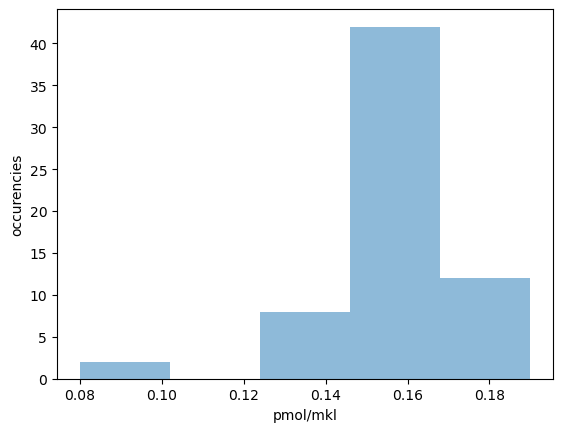

In [423]:
"""
смотрим распределение по корзинам
"""
ax = result['final conc, pmol/mkl'].plot.hist(bins=5, alpha=0.5)
ax.set_xlabel("pmol/mkl")
ax.set_ylabel("occurencies")

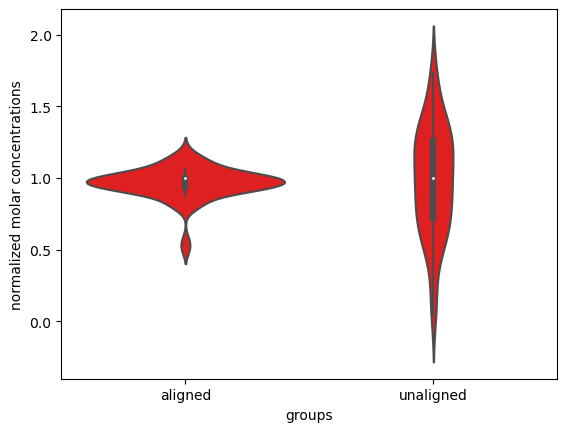

In [424]:
comparison_df = pd.DataFrame([initial_oligos_concentrations, result['final conc, pmol/mkl']]).T
comparison_df["unaligned"] = comparison_df["pM/mkl"]/comparison_df["pM/mkl"].median()
comparison_df["aligned"] = comparison_df['final conc, pmol/mkl']/comparison_df['final conc, pmol/mkl'].median()
comparison_df = comparison_df[["aligned", "unaligned"]]
comparison_df = comparison_df.melt(var_name='groups', value_name='normalized molar concentrations')

import seaborn as sns

ax = sns.violinplot(x = "groups", y="normalized molar concentrations", data=comparison_df, color='r', alpha = 0.1)


Сравниваем 4 эксперимента 
 - с выравниванием и без + эти два с очисткой на магнитных частицах
 - Как сравнивать? 
     - смотреть распределение продуктов на капиллярном форезе
     - по интенсивности на форезе при одинаковом количестве циклов 
     - на риалтаймнике
 - Можно ли одновременно на риалтаймнике?


In [305]:
np.linspace(0, 1, 21)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])